In [56]:
#bibliotecas usadas
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from sklearn.metrics import r2_score
from scipy import stats
import statsmodels.formula.api as sm 


In [38]:
#Importando a base de dados e analisando:
base = pd.read_csv("C:/Users/ferna/OneDrive/Área de Trabalho/Python/CURSO UDEMY- PYTHON/22.Prática em Python/dados/slr12.csv",sep=';')
print(base.head())
print(base.shape)

   FrqAnual  CusInic
0      1000     1050
1      1125     1150
2      1087     1213
3      1070     1275
4      1100     1300
(36, 2)


In [39]:
#FrqAnual : Taxa anual
# CusLnic: investimento Inicial
# Criar um modelo de regressão linear para prever qual será o investimento inicial necessario a partir da taxa anual

In [40]:
x = base.iloc[:,0].values
y = base.iloc[:,1].values

In [41]:
# Analisar a correlação:
correlacao = np.corrcoef(x,y)
correlacao #correlação positiva baixa

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [42]:
X = x.reshape(-1,1)
modelo = LinearRegression()
modelo.fit(X,y)

LinearRegression()

867.6042222620558
[0.37315794]


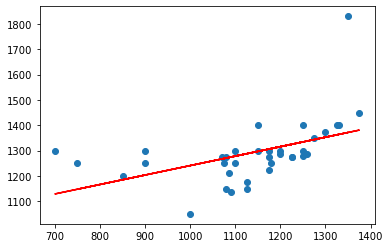

In [43]:
# Fazer o modelo de regressão Linear simples
print(modelo.intercept_) #intercepto
print(modelo.coef_) #coeficiente B1

plt.scatter(X,y) # gráfico de valores observados e reta de regressão
plt.plot(X,modelo.predict(X),color='red')

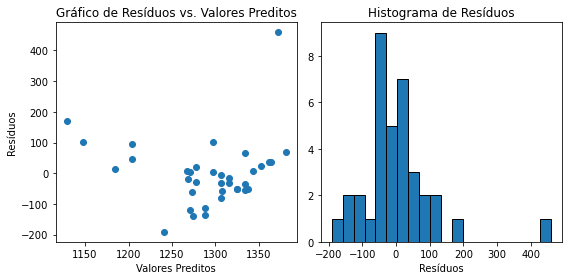

In [44]:
# Análise de resíduos 
y_pred = modelo.predict(X)

# Calcule os resíduos
residuals = y - y_pred
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals)
plt.title('Gráfico de Resíduos vs. Valores Preditos')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, edgecolor='k')
plt.title('Histograma de Resíduos')
plt.xlabel('Resíduos')

plt.tight_layout()
plt.show()

In [45]:
# Testes para normalidade
statistic, p_value = stats.shapiro(residuals)
print(p_value)
statistic, p_value2 = stats.shapiro(residuals)
print(p_value2)
statistic, p_value3 = stats.kstest(residuals, 'norm')
print(p_value3)

#os resíduos não são normais! logo, o modelo de regressão linear simples não é adequado. 

0.00010717472468968481
0.00010717472468968481
7.073559174041196e-10


In [46]:
# Para fins didáticos vou analisar supondo as suposições satisfeitas:
# Calcular o coeficiente de determinação
r_squared = r2_score(y, y_pred)
r_squared

0.2275359181555101

In [54]:
# para obter mais informações decidi utilizar a função ols
modelo_ajustado = sm.ols(formula='y~x',data=base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     10.01
Date:                Thu, 14 Sep 2023   Prob (F-statistic):            0.00327
Time:                        21:48:41   Log-Likelihood:                -219.47
No. Observations:                  36   AIC:                             442.9
Df Residuals:                      34   BIC:                             446.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    867.6042    135.071      6.423      0.000     593.107    1142.102
x              0.3732      0.118      3.165      0.003       0.134       0.613
==============================================================================
Omnibus:                       32.231   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.481
Skew:                           1.975   Prob(JB):                     1.12e-21
Kurtosis:                       9.979   Cond. No.                     8.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O parâmetros estimados para o intercepto e para o coeficiente B1 são ambos significativos pelo teste -t. A função de regressão é u(x) = 867.6042 + 0.3732 x1, x1 sendo a taxa anual. 

In [55]:
# predição para 2450 u.n de taxa anual

modelo.predict([[2450]])

#Estima-se que o investimento inicial seja de 1781.84 reais é necessário tendo 2450 u.n como taxa anual. 

array([1781.84116529])